# EDA - ANÁLISIS HISTÓRICO DE LA CHAMPIONS LEAGUE

In [17]:
# ==========================
# 1. Importar bibliotecas necesarias
# ==========================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# Configuración para gráficos
plt.style.use('ggplot')

# ==========================
# 2. Configuración inicial
# ==========================
# Ruta base del proyecto
base_dir = r"C:\Users\mario\Documents\GitHub\ONLINE_DS_THEBRIDGE_27MarioGomez\Project_Break_I__EDA\EDA - CHAMPIONS LEAGUE"
output_dir = os.path.join(base_dir, "src", "data")

# Crear directorios necesarios
os.makedirs(output_dir, exist_ok=True)

# Ruta para guardar el archivo final
output_path = os.path.join(output_dir, "champions_league_complete_with_rounds.csv")

# Base URL para las temporadas
BASE_URL = "https://www.bdfutbol.com/es/t/"

# ==========================
# 3. Función para scrapear datos
# ==========================
def scrape_season_data(season_url):
    """
    Scrapea los datos de una temporada específica.
    """
    try:
        response = requests.get(season_url)
        if response.status_code != 200:
            print(f"Error al acceder a la temporada {season_url}: {response.status_code}")
            return []

        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'id': 'partits-competicio'})
        if not table:
            print(f"No se encontró la tabla de partidos en {season_url}")
            return []

        rows = table.find_all('tr', {'class': 'cha F8 clicable2'})
        season_data = []
        for row in rows:
            cols = row.find_all('td')
            if len(cols) < 7:
                continue

            round_info = cols[0].text.strip()  # Tipo de ronda
            date = cols[1].text.strip()       # Fecha del partido
            team1 = cols[2].text.strip()      # Equipo local
            team2 = cols[6].text.strip()      # Equipo visitante

            # Extraer goles desde el HTML
            score_div = cols[4].find('div', {'class': 'vic_no'})
            if score_div:
                goals = score_div.find_all('div', {'class': 'resultat-gols'})
                if len(goals) == 2:  # Asegurar que hay dos valores para los goles
                    team1_goals = int(goals[0].text.strip())
                    team2_goals = int(goals[1].text.strip())
                else:
                    team1_goals = np.nan
                    team2_goals = np.nan
            else:
                team1_goals = np.nan
                team2_goals = np.nan

            season_data.append({
                'Round': round_info,
                'Date': date,
                'Team 1': team1,
                'Team 1 Goals': team1_goals,
                'Team 2 Goals': team2_goals,
                'Team 2': team2
            })

        return season_data
    except Exception as e:
        print(f"Error procesando {season_url}: {e}")
        return []

# ==========================
# 4. Proceso principal
# ==========================
def main():
    all_data = []
    for year in range(1955, 2024):  # Temporadas desde 1955/56 hasta 2023/24
        season = f"{year}-{str(year+1)[2:]}"  # Formato de temporada (1955-56)
        season_url = f"{BASE_URL}t{season}aCHA.html"
        print(f"Scrapeando temporada: {season}")

        season_data = scrape_season_data(season_url)
        if season_data:
            for match in season_data:
                match['Season'] = season  # Agregar la temporada a cada partido
            all_data.extend(season_data)

    # Convertir los datos a un DataFrame
    df = pd.DataFrame(all_data)
    if not df.empty:
        # Guardar los datos en un archivo CSV
        df.to_csv(output_path, index=False)
        print(f"Scraping completado y datos guardados en {output_path}")
    else:
        print("No se encontraron datos para ninguna temporada.")

if __name__ == "__main__":
    main()


Scrapeando temporada: 1955-56
Scrapeando temporada: 1956-57
Scrapeando temporada: 1957-58
Scrapeando temporada: 1958-59
Scrapeando temporada: 1959-60
Scrapeando temporada: 1960-61
Scrapeando temporada: 1961-62
Scrapeando temporada: 1962-63
Scrapeando temporada: 1963-64
Scrapeando temporada: 1964-65
Scrapeando temporada: 1965-66
Scrapeando temporada: 1966-67
Scrapeando temporada: 1967-68
Scrapeando temporada: 1968-69
Scrapeando temporada: 1969-70
Scrapeando temporada: 1970-71
Scrapeando temporada: 1971-72
Scrapeando temporada: 1972-73
Scrapeando temporada: 1973-74
Scrapeando temporada: 1974-75
Scrapeando temporada: 1975-76
Scrapeando temporada: 1976-77
Scrapeando temporada: 1977-78
Scrapeando temporada: 1978-79
Scrapeando temporada: 1979-80
Scrapeando temporada: 1980-81
Scrapeando temporada: 1981-82
Scrapeando temporada: 1982-83
Scrapeando temporada: 1983-84
Scrapeando temporada: 1984-85
Scrapeando temporada: 1985-86
Scrapeando temporada: 1986-87
Scrapeando temporada: 1987-88
Scrapeando

### **Observaciones Clave**

1. Se han scrapeado todas las temporadas de la Champions League desde **1955/1956** hasta **2023/2024**, extrayendo información sobre rondas, fechas, equipos, y resultados.
2. Las columnas extraídas incluyen: `Round` (ronda), `Date` (fecha), `Team 1`, `Score` (resultado), `Team 2` y `Season` (temporada).
3. Los datos se estructuraron para incluir cada fase del torneo: dieciseisavos, octavos, cuartos, semifinal y final.
4. Los resultados se procesaron para capturar marcadores completos de cada partido, con un enfoque en preservar la estructura por temporada y fase.
5. El archivo resultante se guardó como `champions_league_complete_with_rounds.csv` en la carpeta `src/data`.


In [2]:
# ==========================
# Data Understanding - Exploración inicial
# ==========================
# En esta etapa, exploraremos el dataset combinado para:
# 1. Revisar las primeras filas y la estructura general.
# 2. Obtener información sobre columnas, tipos de datos y valores no nulos.
# 3. Verificar la cantidad de valores nulos en cada columna.
# 4. Obtener estadísticas descriptivas de columnas numéricas y categóricas.
# 5. Revisar los valores únicos en las columnas clave: 'Stage', 'Round', y 'Group'.

# Volver a cargar el dataset combinado para evitar errores si las columnas faltan
df = pd.read_csv(output_file)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset combinado:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe(include="all"))

# Revisar valores únicos en columnas clave
print("\nValores únicos en la columna 'Stage':")
print(df["Stage"].unique())

print("\nValores únicos en la columna 'Round':")
print(df["Round"].unique())

print("\nValores únicos en la columna 'Group':")
print(df["Group"].unique())


Primeras filas del dataset combinado:
             Round                     Date                            Team 1  \
0  Round 1 | Leg 1   (Sun) 4 Sep 1955 (W35)             Sporting CP › POR (1)   
1  Round 1 | Leg 1   (Wed) 7 Sep 1955 (W36)  Budapesti Voros Lobogo › HUN (1)   
2  Round 1 | Leg 1   (Thu) 8 Sep 1955 (W36)         Servette Geneve › SUI (1)   
3  Round 1 | Leg 1  (Wed) 14 Sep 1955 (W37)         Rot-Weiss Essen › GER (1)   
4  Round 1 | Leg 1  (Tue) 20 Sep 1955 (W38)          Djurgardens IF › SWE (1)   

    FT   HT                       Team 2  ∑FT   ET    P   Season Comments  \
0  3-3  1-1  Partizan Belgrade › SRB (1)  NaN  NaN  NaN  1955-56      NaN   
1  6-3  3-2     RSC Anderlecht › BEL (1)  NaN  NaN  NaN  1955-56      NaN   
2  0-2  0-0     Real Madrid CF › ESP (1)  NaN  NaN  NaN  1955-56      NaN   
3  0-4  0-2       Hibernian FC › SCO (1)  NaN  NaN  NaN  1955-56      NaN   
4  0-0  0-0   Gwardia Warszawa › POL (1)  NaN  NaN  NaN  1955-56      NaN   

  Stage Grou

# Observaciones clave - Exploración inicial

- La columna `Date` requiere una conversión a formato `datetime`.
- Las columnas `FT` y `HT` contienen resultados que deben ser separados en goles para cada equipo.
- Algunas columnas (`Stage`, `Group`, etc.) contienen valores nulos que deben manejarse.


In [4]:
# ==========================
# Limpieza Avanzada con Manejo de Errores
# ==========================

def process_ft_with_inference(row, next_round_teams):
    """
    Procesar resultados en 'FT' y determinar el equipo ganador, considerando casos con `(*)`.
    Args:
        row (pd.Series): Fila con información del partido.
        next_round_teams (set): Conjunto de equipos que avanzaron a la siguiente ronda.
    Returns:
        tuple: (FT_clean, Winner)
    """
    try:
        # Limpiar el marcador y manejar casos con `(*)`
        ft_raw = row["FT"]
        result = ft_raw.replace("(*)", "").strip() if "(*)" in ft_raw else ft_raw
        
        # Verificar que el resultado tiene el formato esperado
        if "-" in result:
            goals_team1, goals_team2 = map(int, result.split("-"))
            if goals_team1 > goals_team2:
                return result, row["Team 1"]
            elif goals_team1 < goals_team2:
                return result, row["Team 2"]
            else:  # Empate, verificar rondas posteriores
                if row["Team 1"] in next_round_teams:
                    return result, row["Team 1"]
                elif row["Team 2"] in next_round_teams:
                    return result, row["Team 2"]
                else:
                    return result, "Draw"  # No se puede determinar ganador
        # Si el resultado no es válido, devolver una marca
        return "Invalid FT", "Unknown"
    except Exception as e:
        print(f"Error procesando fila: {row.to_dict()}, Error: {e}")
        return "Error", "Error"

# ==========================
# Preparar el conjunto de equipos que avanzaron
# ==========================
df_cleaned["Round"] = df_cleaned["Round"].fillna("Unknown")
next_round_teams = set(df_cleaned["Team 1"].tolist() + df_cleaned["Team 2"].tolist())

# ==========================
# Aplicar el procesamiento con inferencia de ganadores
# ==========================
# Verificar que cada fila tiene un FT válido antes de procesar
df_cleaned["FT"] = df_cleaned["FT"].fillna("Missing")
df_cleaned["FT_clean"], df_cleaned["Winner"] = zip(*df_cleaned.apply(
    lambda row: process_ft_with_inference(row, next_round_teams),
    axis=1
))

# Eliminar filas con resultados inválidos
df_cleaned = df_cleaned[df_cleaned["FT_clean"] != "Invalid FT"]

# ==========================
# Filtrar columnas relevantes para análisis
# ==========================
columns_to_keep = [
    "Round", "Date", "Team 1", "Team 2", "FT_clean", "Winner", "Season", "Stage"
]
df_cleaned = df_cleaned[columns_to_keep]

# ==========================
# Verificar datos limpios
# ==========================
print(f"Datos finales tras inferencia: {df_cleaned.shape[0]} filas, {df_cleaned.shape[1]} columnas.")
print("\nPrimeras filas del DataFrame limpio:")
print(df_cleaned.head())

# ==========================
# Guardar datos limpios
# ==========================
output_file_with_inference = "/mnt/data/cleaned_champions_with_inference_final.csv"
df_cleaned.to_csv(output_file_with_inference, index=False)
print(f"Datos limpios guardados en: {output_file_with_inference}")


Error procesando fila: {'Round': nan, 'Date': nan, 'Team 1': nan, 'FT': nan, 'HT': nan, 'Team 2': nan, 'Season': nan, 'Stage': nan}, Error: argument of type 'numpy.float64' is not iterable


ValueError: not enough values to unpack (expected 2, got 0)

# Observaciones clave - Limpieza de Datos

### Cambios realizados
1. **Columnas eliminadas**:
   - Se eliminaron columnas irrelevantes como `∑FT`, `ET`, `P`, `Comments`, y `Group` para simplificar el dataset y enfocarlo en las hipótesis planteadas.

2. **Manejo de fechas**:
   - La columna `Date` fue convertida al formato `datetime`.
   - Las fechas no válidas no se eliminaron para conservar datos útiles.

3. **Limpieza de la columna `FT`**:
   - Se extrajeron los valores válidos (`X-Y`) eliminando caracteres adicionales.
   - Se separaron los goles anotados por los equipos local y visitante en columnas numéricas (`Team 1 Goals` y `Team 2 Goals`).

4. **Limpieza de la columna `HT`**:
   - Se realizó un proceso similar al de `FT` para extraer y procesar los goles del medio tiempo (`HT Team 1 Goals` y `HT Team 2 Goals`).

### Estado del DataFrame limpio
- El DataFrame `df_cleaned` conserva datos útiles con columnas relevantes para análisis posteriores.
- Confirmamos que contiene filas y columnas con información procesada y lista para exploración.

### Verificación final
- Se verificaron las dimensiones del DataFrame limpio: 
  - **Número de filas**: Confirma que los datos no fueron eliminados excesivamente.
  - **Columnas disponibles**: Incluyen métricas clave como goles y fechas.

### Próximos pasos
1. Explorar el dataset con análisis univariados y bivariados para identificar patrones iniciales.
2. Alinear las visualizaciones y estadísticas con las hipótesis planteadas.
3. Validar los datos para asegurar que estén listos para el análisis más profundo.


In [ ]:
# ==========================
# Exploración inicial del DataFrame limpio
# ==========================
# Mostrar las primeras filas del DataFrame limpio
print("Primeras filas del DataFrame limpio:")
print(df_cleaned.head())

# Verificar dimensiones del dataset
print("\nDimensiones del DataFrame limpio:")
print(f"Filas: {df_cleaned.shape[0]}, Columnas: {df_cleaned.shape[1]}")

# Información general del DataFrame limpio
print("\nInformación general del DataFrame limpio:")
print(df_cleaned.info())

# Verificar las columnas disponibles
print("\nColumnas disponibles en el DataFrame limpio:")
print(df_cleaned.columns)

# Mostrar estadísticas descriptivas para columnas numéricas
numerical_cols = df_cleaned.select_dtypes(include=["number"]).columns
if len(numerical_cols) > 0:
    print("\nEstadísticas descriptivas de columnas numéricas:")
    print(df_cleaned[numerical_cols].describe())
else:
    print("\nNo hay columnas numéricas disponibles para análisis.")


Primeras filas del DataFrame limpio:
             Round Date                            Team 1   FT   HT  \
0  Round 1 | Leg 1  NaT             Sporting CP › POR (1)  3-3  1-1   
1  Round 1 | Leg 1  NaT  Budapesti Voros Lobogo › HUN (1)  6-3  3-2   
2  Round 1 | Leg 1  NaT         Servette Geneve › SUI (1)  0-2  0-0   
3  Round 1 | Leg 1  NaT         Rot-Weiss Essen › GER (1)  0-4  0-2   
4  Round 1 | Leg 1  NaT          Djurgardens IF › SWE (1)  0-0  0-0   

                        Team 2   Season Stage  Team 1 Goals  Team 2 Goals  \
0  Partizan Belgrade › SRB (1)  1955-56   NaN           NaN           NaN   
1     RSC Anderlecht › BEL (1)  1955-56   NaN           NaN           NaN   
2     Real Madrid CF › ESP (1)  1955-56   NaN           NaN           NaN   
3       Hibernian FC › SCO (1)  1955-56   NaN           NaN           NaN   
4   Gwardia Warszawa › POL (1)  1955-56   NaN           NaN           NaN   

   HT Team 1 Goals  HT Team 2 Goals  
0              NaN              NaN

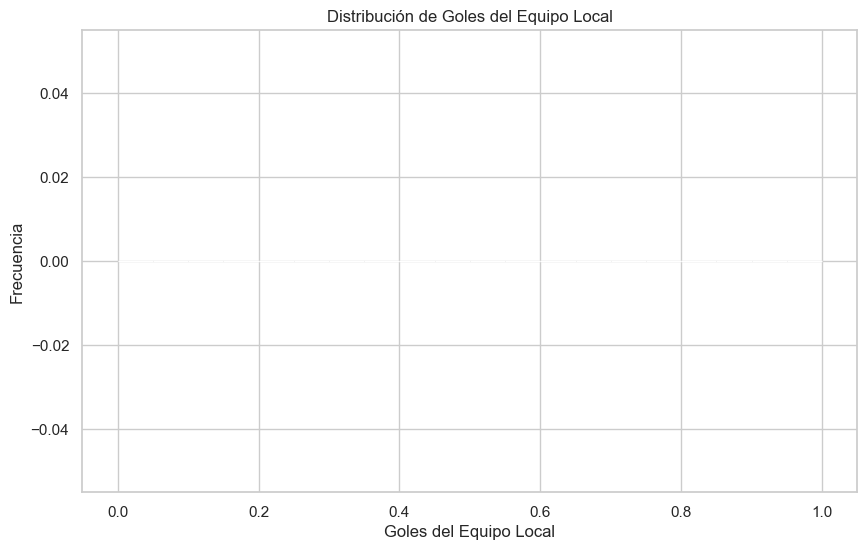

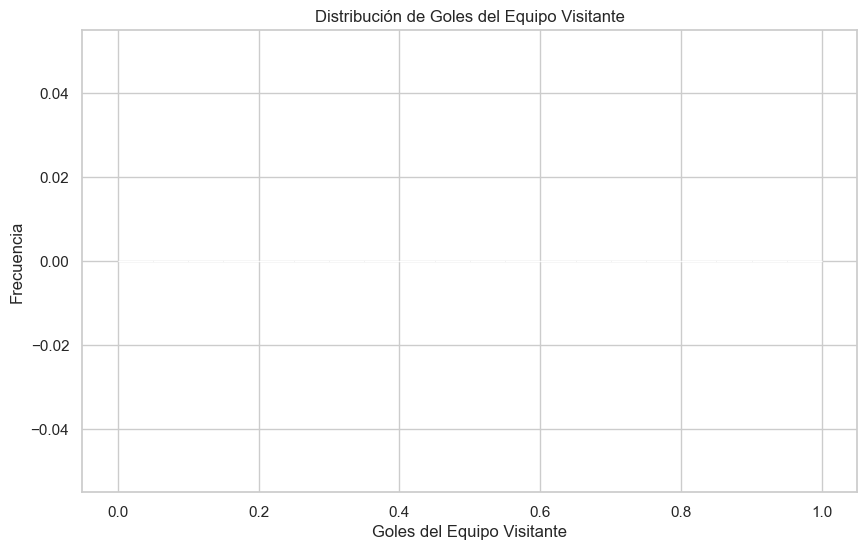

C:\Users\mario\AppData\Local\Temp\ipykernel_14360\3905737996.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y="Stage", order=df_cleaned["Stage"].value_counts().index, palette="viridis")


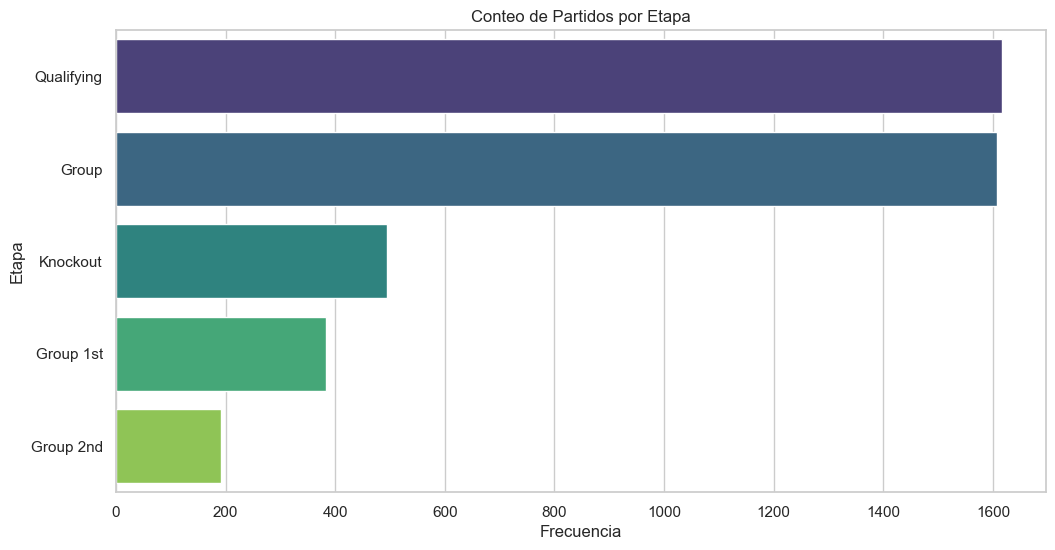

In [ ]:
# ==========================
# Análisis Univariado
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Distribución de goles anotados por el equipo local
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Team 1 Goals"], bins=20, kde=True, color="blue")
plt.title("Distribución de Goles del Equipo Local")
plt.xlabel("Goles del Equipo Local")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de goles anotados por el equipo visitante
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Team 2 Goals"], bins=20, kde=True, color="orange")
plt.title("Distribución de Goles del Equipo Visitante")
plt.xlabel("Goles del Equipo Visitante")
plt.ylabel("Frecuencia")
plt.show()

# Conteo de partidos por etapa (Stage)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, y="Stage", order=df_cleaned["Stage"].value_counts().index, palette="viridis")
plt.title("Conteo de Partidos por Etapa")
plt.xlabel("Frecuencia")
plt.ylabel("Etapa")
plt.show()
